In [2]:
from __future__ import division

import pdb
import sys
import argparse
import itertools

import numpy as np
from numpy import pi, exp, sqrt
from scipy.stats import norm

import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

sys.path.insert(0, '../../../network')
from transfer_functions import ErrorFunction

sys.path.insert(0, '../../../theory')
from capacity import capacity, M_c

sys.path.insert(0, '../../../figures')
import plot_utils as pu
import color_scheme as cs

Load data

In [3]:
datapath1 = "data/data_b.npy"
datapath2 = "data/data_a.npy"

In [4]:
M1, m1 = np.load(open(datapath1, "rb"), allow_pickle=True)[:2]
m2, M2 = np.load(open(datapath2, "rb"), allow_pickle=True)

Plot

/home/mhg19/Manuscripts/PNAS19/sci/lib64/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in log
/home/mhg19/Manuscripts/PNAS19/sci/lib64/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in multiply
/home/mhg19/Manuscripts/PNAS19/sci/lib64/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in sqrt


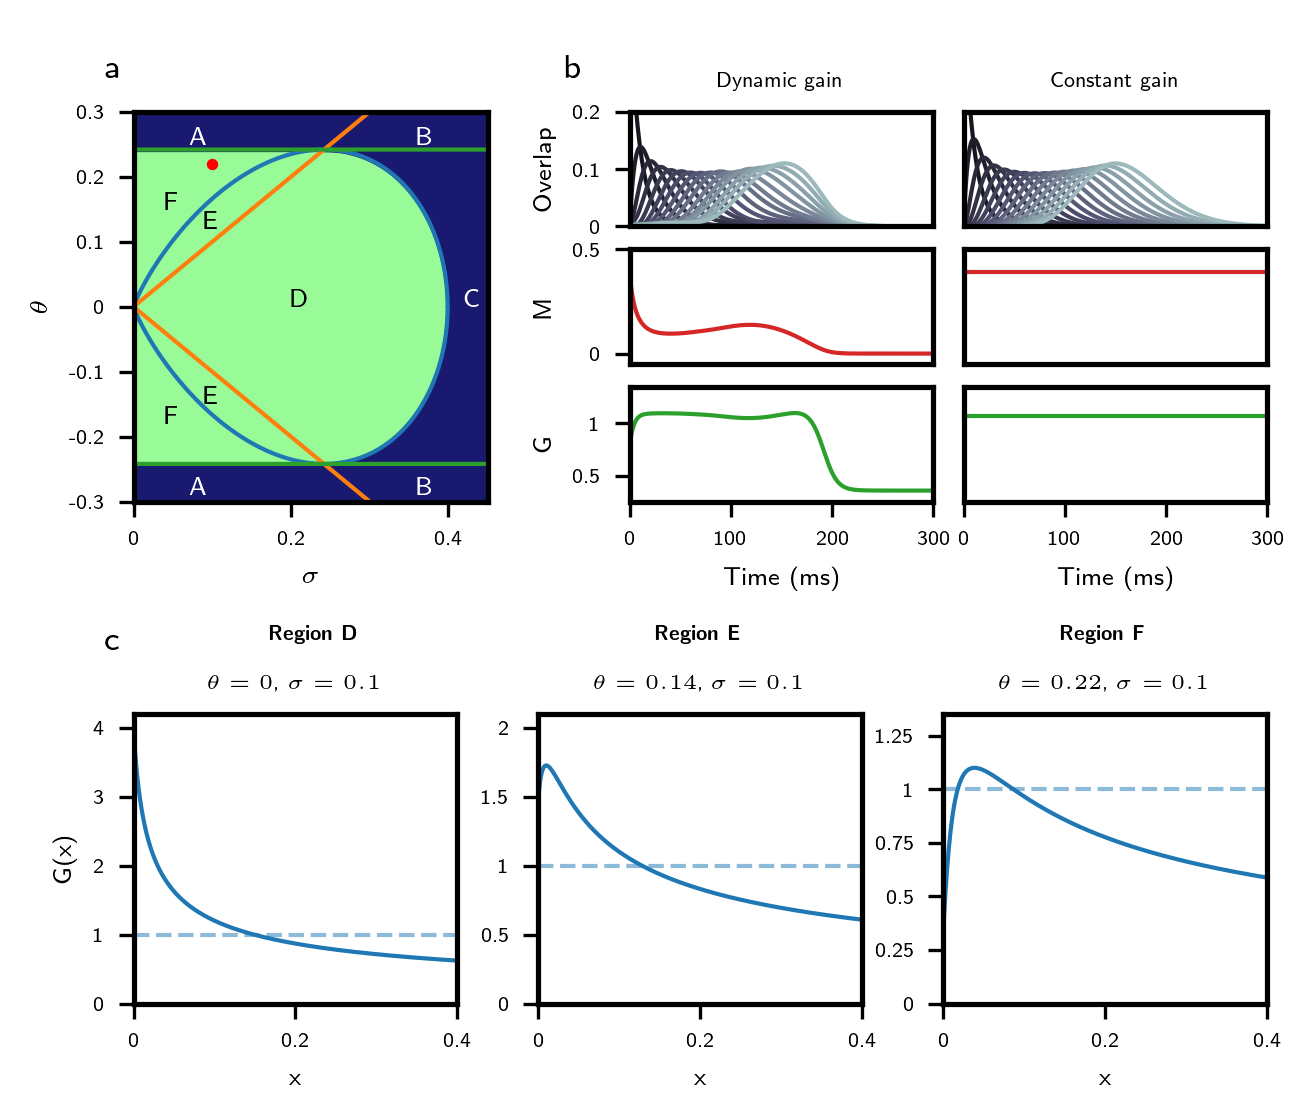

In [23]:
pu.figure_setup()
params = {
    'font.size': 6,
    'font.sans-serif': 'Arial',
    'axes.labelsize': 6,
    'axes.titlesize': 5,
    'axes.linewidth': 1.25,
    'lines.linewidth': 1.0,
    'legend.fontsize': 6,
    'xtick.labelsize': 5,
    'ytick.labelsize': 5}
plt.rcParams.update(params)

fig_size = pu.get_fig_size(12, 10)
fig = plt.figure(figsize=fig_size)

gs1 = gridspec.GridSpec(1, 1)
gs1.update(left=0.15, right=0.40, bottom=0.55, wspace=0.10)
ax1 = plt.subplot(gs1[0, 0])

gs2 = gridspec.GridSpec(3, 2)
gs2.update(left=0.50, right=0.95, bottom=0.55, wspace=0.10)
ax2 = plt.subplot(gs2[0, 0])
ax3 = plt.subplot(gs2[1, 0])
ax4 = plt.subplot(gs2[2, 0])
ax5 = plt.subplot(gs2[0, 1])
ax6 = plt.subplot(gs2[1, 1])
ax7 = plt.subplot(gs2[2, 1])

gs3 = gridspec.GridSpec(1, 3)
gs3.update(left=0.15, right=0.95, top=0.37, wspace=0.25)
ax8 = plt.subplot(gs3[0, 0])
ax9 = plt.subplot(gs3[0, 1])
ax10 = plt.subplot(gs3[0, 2])

ax1.annotate("a", xy=(0.08,0.93), xycoords='figure fraction', fontsize=8)
ax2.annotate("b", xy=(0.43,0.93), xycoords='figure fraction', fontsize=8)
ax2.annotate("c", xy=(0.08,0.42), xycoords='figure fraction', fontsize=8)

# Rate transfer function
alpha = 16./0.005/40000 # S*P/c/N
theta, sigma = 0.22, 0.1
phif = ErrorFunction(mu=theta, sigma=sigma).phi

# Gain function
G = lambda x: exp(-theta**2 / (2 * (x))) / sqrt(2 * pi * (x))

# ------- Panel a ------------------------------------------------------------------

m0 = norm.expect(lambda v: v*phif(v), scale=1)
M0 = norm.expect(lambda v: phif(v)**2, scale=1)

def truncate(x, thresh):
    return np.clip(x, thresh, np.inf)

x = np.linspace(0,0.5,10000)
a = np.sqrt(-2*x**2*np.log(np.sqrt(2*np.pi*x**2)))
b = x 
c = 1. / np.sqrt(2*exp(1)*np.pi)

C1 = 'midnightblue'
C2 = 'palegreen'
A1 = 1.0
A2 = 1.0

# Successful retrieval
ax1.fill_between(x=x, y1=np.full_like(x, fill_value=-0.3), y2=np.full_like(x, fill_value=0.3), color=C2)

# Unsuccesful retrieval
d = 0.242
ax1.fill_between(x=x, y1=np.full_like(x, fill_value=c), y2=np.full_like(x, fill_value=0.3), color=C1, alpha=A1)
ax1.fill_between(x=x, y1=np.full_like(x, fill_value=-c), y2=np.full_like(x, fill_value=-0.3), color=C1, alpha=A1)
ax1.fill_between(x=x[x>d], y1=a[x>d], y2=np.full_like(a[x>d], fill_value=c), color=C1, alpha=A1) 
ax1.fill_between(x=x[x>d], y1=-a[x>d], y2=np.full_like(-a[x>d], fill_value=-c), color=C1, alpha=A1)
ax1.fill_between(x=x[x>0.399], y1=np.full_like(x[x>0.399], fill_value=-c), y2=np.full_like(x[x>0.399], fill_value=c), color=C1, alpha=A1)

ax1.annotate("A", xy=(0.07,0.25),  xycoords='data', fontsize=6, color='white')
ax1.annotate("A", xy=(0.07,-0.29), xycoords='data', fontsize=6, color='white')
ax1.annotate("B", xy=(0.36,-0.29), xycoords='data', fontsize=6, color='white')
ax1.annotate("B", xy=(0.36,0.25),  xycoords='data', fontsize=6, color='white')
ax1.annotate("C", xy=(0.42,0.0),   xycoords='data', fontsize=6, color='white')
ax1.annotate("D", xy=(0.20,0.0),   xycoords='data', fontsize=6, color='black')
ax1.annotate("E", xy=(0.09,0.12),  xycoords='data', fontsize=6, color='black')
ax1.annotate("E", xy=(0.09,-0.15), xycoords='data', fontsize=6, color='black')
ax1.annotate("F", xy=(0.04,0.15),  xycoords='data', fontsize=6, color='black')
ax1.annotate("F", xy=(0.04,-0.18), xycoords='data', fontsize=6, color='black')

ax1.plot(x, a, linewidth=1, color='C0', label='')
ax1.plot(x, b, linewidth=1, color='C1', label='')
ax1.plot(x, np.full_like(x, fill_value=c), linewidth=1, color='C2', label='')
ax1.plot(x, -a, linewidth=1, color='C0', label='')
ax1.plot(x, -b, linewidth=1, color='C1', label='')
ax1.plot(x, -np.full_like(x, fill_value=c), linewidth=1, color='C2', label='')
ax1.scatter(sigma, theta, s=3, color='red')

ax1.set_xlabel(r"$\sigma$")
ax1.set_ylabel(r"$\theta$")
ax1.set_ylim([-.3,.3])
ax1.set_xticks([0, 0.2, 0.4])
ax1.set_xticklabels([0, 0.2, 0.4])
ax1.set_xlim([0,0.45])
ax1.set_yticks([-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
ax1.set_yticklabels([-0.3,-0.2,-0.1,0,0.1,0.2,0.3])

# ------- Panel b ------------------------------------------------------------------

cmap = matplotlib.cm.get_cmap("bone")
colors = [cmap(x) for x in np.linspace(0.1,0.7,len(m1))[::1]]

t = np.arange(len(M1))

R1 = np.sqrt(np.sum(m1**2,axis=0) + alpha*M1)
G1 = G(R1**2 + sigma**2)
for m, c in zip(m1, colors):
    ax2.plot(t, m, color=c)
ax3.plot(t, M1, color='C3')
ax4.plot(t, G1, color='C2')

G1_mean = np.mean(G1[:m1[-1].argmax()])

R2 = np.sqrt(alpha * np.full_like(t, fill_value=M0, dtype=float)) 
G2 = np.full_like(t, fill_value=G1_mean, dtype=float)
for m, c in zip(m2, colors):
    ax5.plot(t, m, color=c)
ax6.plot(t, np.full_like(t,fill_value=M2, dtype=float), color='C3')
ax7.plot(t, G2, color='C2')

# m
ax2.set_ylim([0,0.2])
ax5.set_ylim([0,0.2])
ax2.set_xticks([])
ax5.set_xticks([])

# M
ax3.set_ylim([-0.05,0.5])
ax6.set_ylim([-0.05,0.5])
ax3.set_xticks([])
ax6.set_xticks([])

# G
ax4.set_ylim([0.25, 1.35])
ax7.set_ylim([0.25, 1.35])

ax5.set_yticks([])
ax6.set_yticks([])
ax7.set_yticks([])

ax2.set_ylabel("Overlap")
ax3.set_ylabel("M")
ax4.set_ylabel("G")

ax4.set_xlabel("Time (ms)")
ax7.set_xlabel("Time (ms)")

ax2.set_title("Dynamic gain")
ax5.set_title("Constant gain")

ax2.set_yticks([0,0.1,0.2])
ax2.set_yticklabels([0,0.1,0.2])
ax3.set_yticks([0,0.5])
ax3.set_yticklabels([0,0.5])
ax4.set_yticks([0.5,1])
ax4.set_yticklabels([0.5,1])

ax4.set_xticks([0,100,200,300])
ax4.set_xticklabels([0,100,200,300])
ax7.set_xticks([0,100,200,300])
ax7.set_xticklabels([0,100,200,300])

for ax in [ax2,ax3,ax4,ax5,ax6,ax7]:
    ax.set_xlim([0,300])

# ------- Panel c ------------------------------------------------------------------

x = np.linspace(0.000,0.5,1000)
sigma = 0.1
theta = [0, 0.14, 0.22]
G = np.vectorize(lambda x, theta, sigma: 
        exp(-theta**2 / (2 * (sigma**2 + x))) / sqrt(2 * pi * (sigma**2 + x)))

for ax, theta_ in zip([ax8,ax9,ax10], theta):
    ax.plot(x, G(x, theta_, sigma))

for ax in [ax8,ax9,ax10]:
    ax.axhline(1, linestyle='dashed', alpha=0.5)
    ax.set_xlim([0,0.4])
    ax.set_xlabel("x")
    ax.set_xticks([0,0.2,0.4])
    ax.set_xticklabels([0,0.2,0.4])

ax8.set_ylim([0,4.2])
ax9.set_ylim([0,2.1])
ax10.set_ylim([0,1.35])

ax8.set_ylabel("G(x)")

ax8.set_yticks([0,1,2,3,4])
ax8.set_yticklabels([0,1,2,3,4])
ax9.set_yticks([0,0.5,1,1.5,2])
ax9.set_yticklabels([0,0.5,1,1.5,2])
ax10.set_yticks([0,0.25,0.5,0.75,1,1.25])
ax10.set_yticklabels([0,0.25,0.5,0.75,1,1.25])

ax8.set_title(r"\textbf{Region D}\\$\theta=0$, $\sigma=0.1$")
ax9.set_title(r"\textbf{Region E}\\$\theta=0.14$, $\sigma=0.1$")
ax10.set_title(r"\textbf{Region F}\\$\theta=0.22$, $\sigma=0.1$")

plt.savefig("../output/4.pdf", dpi=300, bbox_inches="tight")